In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import datasets as ds
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
# load data
iris = ds.load_iris()
y = iris.target
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
colname = [
    'sepal_length',
    'sepal_width',
    'petal_length',
    'petal_width'
]

data = pd.DataFrame(iris.data,columns = colname)
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
data['class'] = y
data['class'] = data['class'].map({0:'setosa',1:'versicolor',2:'virginica'})

In [6]:
data['class'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: class, dtype: int64

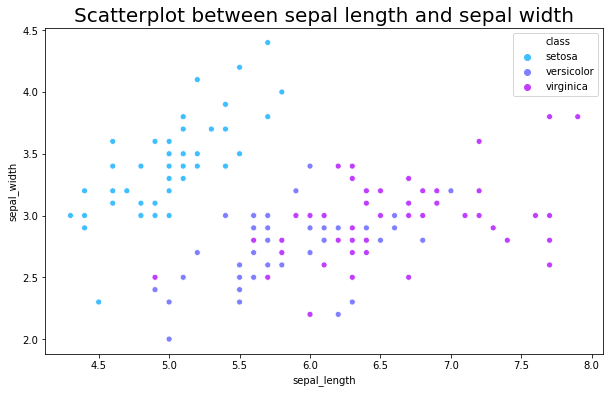

In [7]:
plt.figure(figsize=(10,6))
plt.title("Scatterplot between sepal length and sepal width",fontsize=20)
sns.scatterplot(data=data,x='sepal_length',y='sepal_width',hue='class',palette='cool')

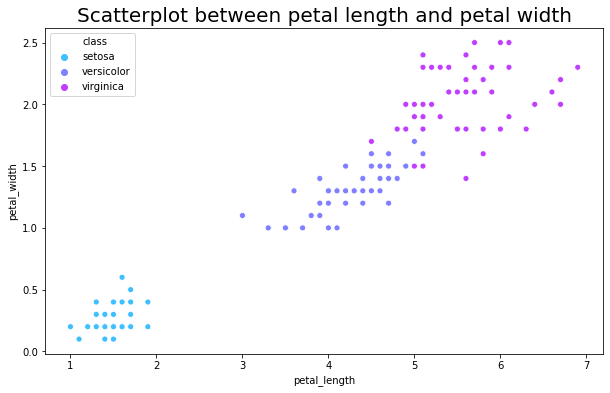

In [8]:
plt.figure(figsize=(10,6))
plt.title("Scatterplot between petal length and petal width",fontsize=20)
sns.scatterplot(data=data,x='petal_length',y='petal_width',hue='class',palette='cool')

In [9]:
X = data.drop(['class'],axis=1)

In [10]:
y = data['class']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

#instantiate the model
clf_knn = KNeighborsClassifier(n_neighbors=3)

#fit the model
clf_knn.fit(X_train,y_train)

y_pred = clf_knn.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_pred)))

Accuracy: 0.9333333333333333


In [13]:
print(confusion_matrix(y_true = y_test,y_pred=y_pred))
print(classification_report(y_pred,y_test))

[[13  0  0]
 [ 0 17  1]
 [ 0  2 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      0.89      0.92        19
   virginica       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



In [14]:
#using the test set for hyperparameter tunning can lead to overfit
neighbors = list(range(1,50,2))
cv_scores = []
for k in neighbors:
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf_knn,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    

In [15]:
mse = [1-x for x in cv_scores]
mse
def find_min_idx(x):
    idx_val = []
    for i,j in enumerate(x):
        if j == min(mse):
            idx_val.append(i)
#     print(idx_val,max(idx_val))
    return max(idx_val)

In [16]:
min_idx = find_min_idx(mse)
optimal_k = neighbors[min_idx] 
optimal_mse = min(mse)
print("The optimal number of neighbors is : {} with mse : {} ".format(optimal_k,optimal_mse))

The optimal number of neighbors is : 5 with mse : 0.01909090909090916 


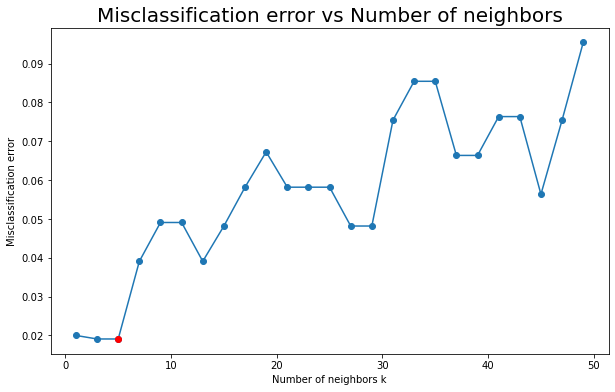

In [17]:
plt.figure(figsize=(10,6))
plt.title("Misclassification error vs Number of neighbors",fontsize=20)
plt.plot(neighbors,mse,marker='o')
plt.xlabel("Number of neighbors k")
plt.ylabel("Misclassification error")
plt.plot(optimal_k,optimal_mse,'ro')
plt.show()